In [322]:
# import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import statsmodels.api as sm
import itertools
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [323]:
# Read Cisco data
df_original = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv')
df = df_original.copy()
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,17.21,17.49,17.18,17.45,55432166,CSCO
1,2006-01-04,17.48,17.93,17.46,17.85,80409776,CSCO
2,2006-01-05,17.94,18.48,17.93,18.35,118588943,CSCO
3,2006-01-06,18.51,18.88,18.47,18.77,122450979,CSCO
4,2006-01-09,18.97,19.11,18.92,19.06,78604868,CSCO
...,...,...,...,...,...,...,...
3014,2017-12-22,38.52,38.74,38.47,38.55,11441622,CSCO
3015,2017-12-26,38.55,38.68,38.36,38.48,8186082,CSCO
3016,2017-12-27,38.54,38.65,38.45,38.56,10543034,CSCO
3017,2017-12-28,38.73,38.73,38.45,38.59,8807745,CSCO


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [325]:
df['Date'] = pd.to_datetime(df['Date'])

In [326]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,17.21,17.49,17.18,17.45,55432166,CSCO
1,2006-01-04,17.48,17.93,17.46,17.85,80409776,CSCO
2,2006-01-05,17.94,18.48,17.93,18.35,118588943,CSCO
3,2006-01-06,18.51,18.88,18.47,18.77,122450979,CSCO
4,2006-01-09,18.97,19.11,18.92,19.06,78604868,CSCO


In [327]:
df.set_index('Date' , inplace =True )

In [328]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,17.21,17.49,17.18,17.45,55432166,CSCO
2006-01-04,17.48,17.93,17.46,17.85,80409776,CSCO
2006-01-05,17.94,18.48,17.93,18.35,118588943,CSCO
2006-01-06,18.51,18.88,18.47,18.77,122450979,CSCO
2006-01-09,18.97,19.11,18.92,19.06,78604868,CSCO


In [329]:
df.drop(['Open','High','Low','Volume','Name'],axis = 1 , inplace = True)

In [330]:
df.head()

,Close
Date,
2006-01-03,17.45
2006-01-04,17.85
2006-01-05,18.35
2006-01-06,18.77
2006-01-09,19.06


In [331]:
df.rename(columns={'Close':'Price'},inplace = True)

Text(0, 0.5, 'Price per day')

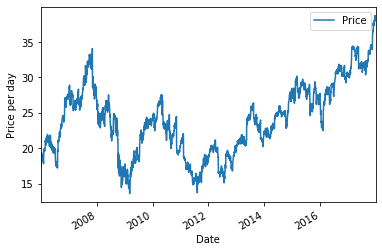

In [332]:
#plot graph before resample
df.plot()
plt.ylabel("Price per day")

In [353]:
#resample 
df = df.resample('M').sum()
#df.head(2)

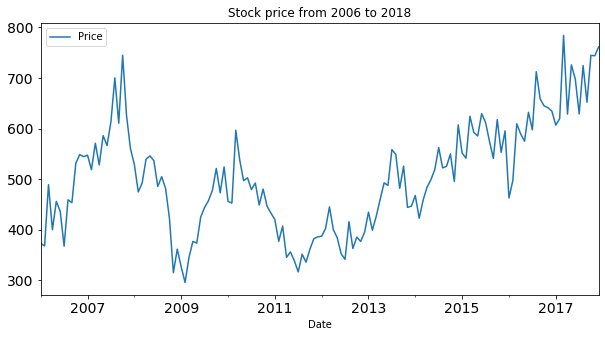

In [336]:
df.plot(figsize = (10,5),title = "Stock price from 2006 to 2018" , fontsize = 14)

## Component of Time Series Data 
 - Trend
 - Seasonality
 - Cyclical
 - Irregrular

<Figure size 576x360 with 0 Axes>

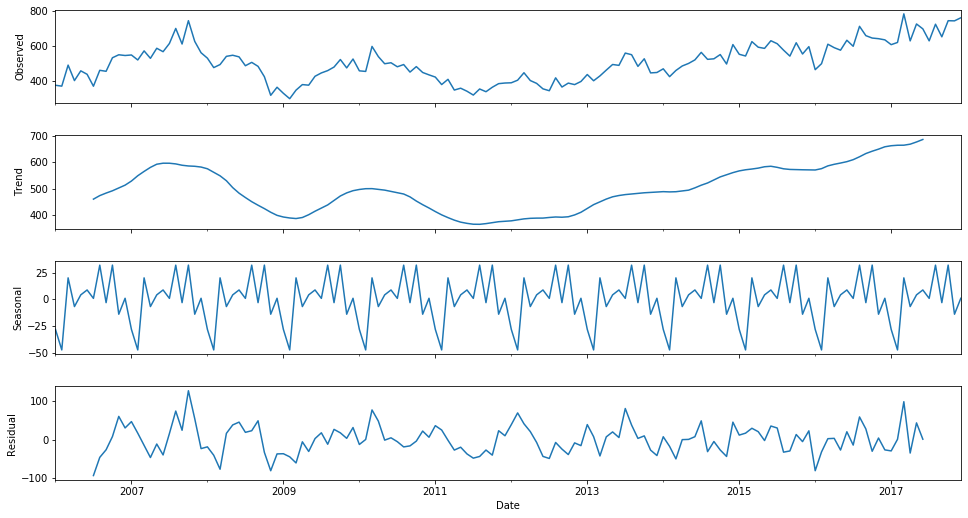

In [337]:
# decompose 

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,freq =12)
fig = plt.figure(figsize = (8,5))
fig = decomposition.plot()
fig.set_size_inches(15,8)

In [338]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries , window):
    #Determing rolling Statistics:
    rolmean = timeseries.rolling(window = window).mean()
    rolstd = timeseries.rolling(window = window).std()
    
    #plot rolling statistics
    fig = plt.figure(figsize = (10,5))
    plt.plot(timeseries,color ='blue',label = 'original')
    plt.plot(rolmean,color='red',label ='mean')
    plt.plot(rolstd,color='black',label ='std')
    plt.legend(loc ='best')
    plt.title("Rolling mean & std ")
    plt.show()
    
    # Dickey-Fuller Test:
    
    print("Result Dickey-Fuller Test")
    dftest = adfuller(timeseries,autolag ='AIC')
    
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','P-value','#Lags','No of obs'])
    for key,value in dftest[4].items():
        dfoutput[f"Critical_value { key }"] = value
    
    print(dfoutput)

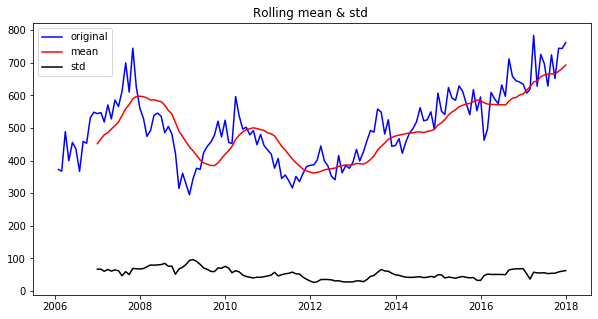

Result Dickey-Fuller Test
Test Statistic         -0.942235
P-value                 0.773746
#Lags                  13.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [339]:
test_stationarity(df.Price,12)

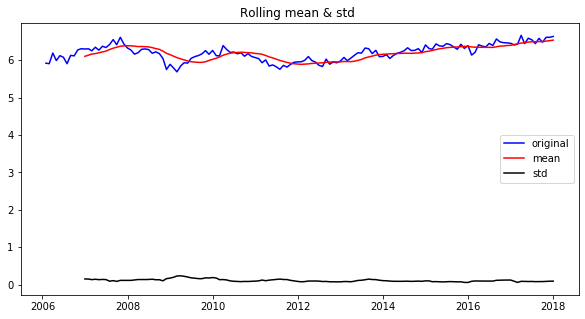

Result Dickey-Fuller Test
Test Statistic         -1.184139
P-value                 0.680381
#Lags                  13.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [340]:
#moving data with log
df['log'] = df['Price'].apply(lambda x:np.log(x))
test_stationarity(df['log'],12)    

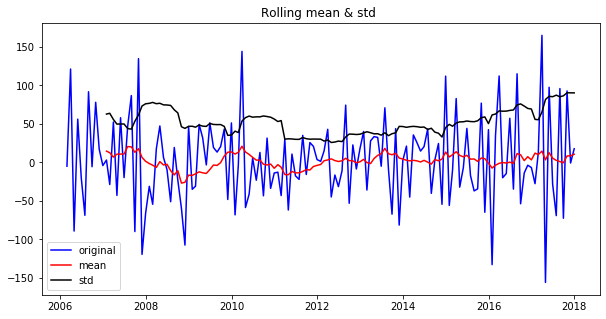

Result Dickey-Fuller Test
Test Statistic         -3.178752
P-value                 0.021248
#Lags                  12.000000
No of obs             130.000000
Critical_value 1%      -3.481682
Critical_value 5%      -2.884042
Critical_value 10%     -2.578770
dtype: float64


In [341]:
# first differentiate
df['first_diff'] = df['Price'].diff()
df.dropna(inplace = True)
test_stationarity(df['first_diff'],12)

In [342]:
df

,Price,log,first_diff
Date,,,
2006-02-28,367.79,5.907512,-5.00
2006-03-31,488.95,6.192260,121.16
2006-04-30,399.77,5.990889,-89.18
2006-05-31,455.88,6.122230,56.11
2006-06-30,436.05,6.077757,-19.83
...,...,...,...
2017-08-31,724.58,6.585592,95.81
2017-09-30,652.06,6.480137,-72.52
2017-10-31,744.82,6.613143,92.76


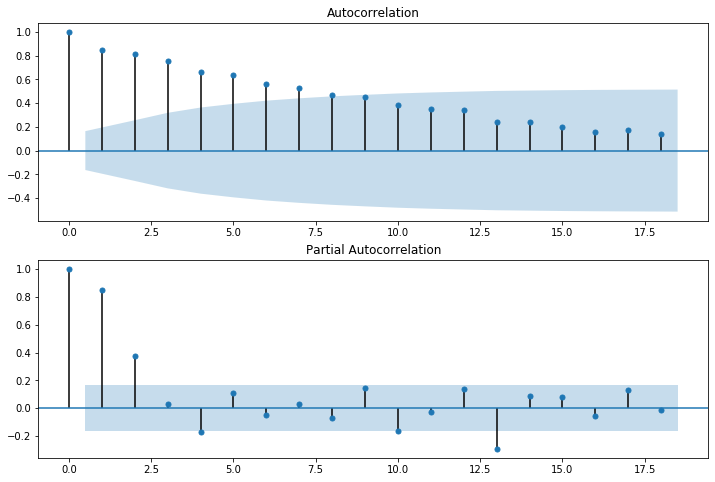

In [343]:
#ploting  ACF and PACT of price 
fig = plt.figure(figsize=(12,8))

ax1 =fig.add_subplot(211)
#acf
fig = sm.graphics.tsa.plot_acf(df.Price,lags=18,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.Price,lags =18 ,ax =ax2)

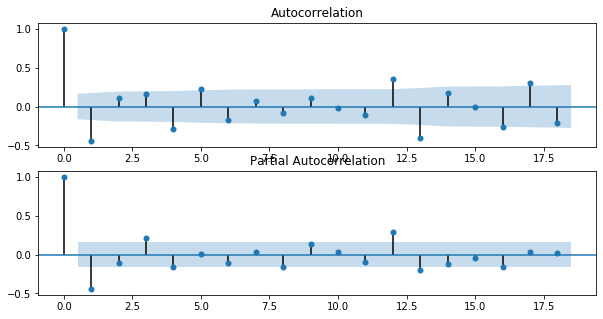

In [344]:
# ploting acf and pacf of first_diff data
fig = plt.figure(figsize=(10,5))
ax1 =fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.first_diff,lags=18,ax=ax1)   #acf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.first_diff,lags =18 ,ax =ax2)   #pacf

In [345]:
#modeling 
mod = sm.tsa.statespace.SARIMAX(df.Price,trend='n', order=(1,1,1),seasonal_order=(1,1,1,12))
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -687.485
Date:                            Fri, 10 Jan 2020   AIC                           1384.971
Time:                                    10:58:27   BIC                           1399.309
Sample:                                02-28-2006   HQIC                          1390.797
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1506      0.307     -0.491      0.623      -0.751       0.450
ma.L1         -0.1302      0.306     -0.426      0.670      -0.730       0.469
ar.S.L12       0.1492      0.149      1.000      0.317      -0.143       0.442
ma.S.L12      -0.9927      3.274     -0.303      0.762      -7.409       5.424
sigma2      1886.9780   6054.585      0.312      0.755   -9979.790    1.38e+04
===================================================================================
Ljung-Box (Q):                       83.71   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.00   Prob(JB):                         0.56
Heteroskedasticity (H):               0.85   Skew:                            -0.19
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

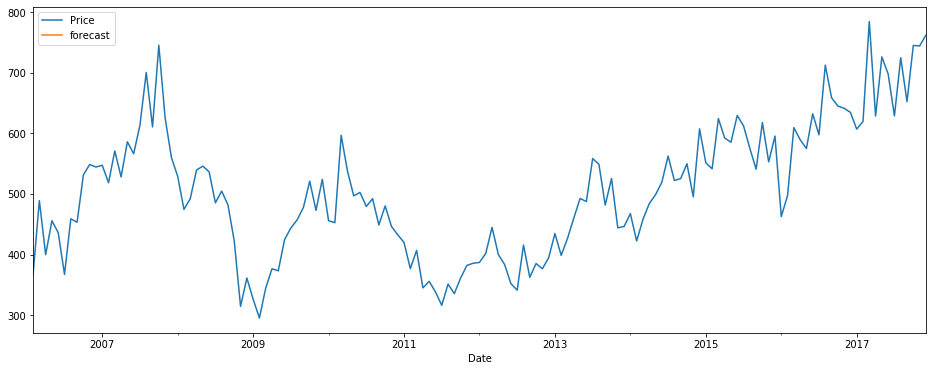

In [346]:
# forcasting
df['forecast'] = res.predict(start=80,end =150 ,dynamic = False)
df[['Price','forecast']].plot(figsize = (16,6))

In [347]:
df

,Price,log,first_diff,forecast
Date,,,,
2006-02-28,367.79,5.907512,-5.00,NaN
2006-03-31,488.95,6.192260,121.16,NaN
2006-04-30,399.77,5.990889,-89.18,NaN
2006-05-31,455.88,6.122230,56.11,NaN
2006-06-30,436.05,6.077757,-19.83,NaN
...,...,...,...,...
2017-08-31,724.58,6.585592,95.81,NaN
2017-09-30,652.06,6.480137,-72.52,NaN
2017-10-31,744.82,6.613143,92.76,NaN


In [351]:
# Let's use a systematic approach to finding the order of AR and MA processes.
# we can take probability range from acf and pacf graph
p=d=q=range(1,3)
pdq = list(itertools.product(p,d,q))
pdqs = [ (x[0],x[1],x[2],12) for x in pdq]
print("Order : ",pdq,'\n',"seasonal_order :", pdqs)

Order :  [(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2)] 
 seasonal_order : [(1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [295]:
ans = []
for comb in pdq:
    for combs in pdqs:
        mod = sm.tsa.statespace.SARIMAX(df.Price,
                                        order=comb,
                                        seasonal_order=combs,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        output = mod.fit()
        ans.append([comb,combs,output.aic])
        print(f" ARIMA {comb} x {combs} 12 : AIC = {output.aic}")

 ARIMA (1, 1, 1) x (1, 1, 1, 12) 12 : AIC = 1227.2114560063708
 ARIMA (1, 1, 1) x (1, 1, 2, 12) 12 : AIC = 1095.7735951979068
 ARIMA (1, 1, 1) x (1, 2, 1, 12) 12 : AIC = 1150.5498789356698
 ARIMA (1, 1, 1) x (1, 2, 2, 12) 12 : AIC = 1001.8617781033889
 ARIMA (1, 1, 1) x (2, 1, 1, 12) 12 : AIC = 1108.6173945334194
 ARIMA (1, 1, 1) x (2, 1, 2, 12) 12 : AIC = 1097.4501085387958
 ARIMA (1, 1, 1) x (2, 2, 1, 12) 12 : AIC = 1018.1743814448354
 ARIMA (1, 1, 1) x (2, 2, 2, 12) 12 : AIC = 1003.8430241035014
 ARIMA (1, 1, 2) x (1, 1, 1, 12) 12 : AIC = 1218.1239568089898
 ARIMA (1, 1, 2) x (1, 1, 2, 12) 12 : AIC = 1085.9355106292212
 ARIMA (1, 1, 2) x (1, 2, 1, 12) 12 : AIC = 1140.1978170380723
 ARIMA (1, 1, 2) x (1, 2, 2, 12) 12 : AIC = 990.3575148828577
 ARIMA (1, 1, 2) x (2, 1, 1, 12) 12 : AIC = 1108.7595996548864
 ARIMA (1, 1, 2) x (2, 1, 2, 12) 12 : AIC = 1087.9281954159514
 ARIMA (1, 1, 2) x (2, 2, 1, 12) 12 : AIC = 1018.1442080981394
 ARIMA (1, 1, 2) x (2, 2, 2, 12) 12 : AIC = 995.79564422

In [296]:
df_ans = pd.DataFrame(ans , columns=['pdq','pdqs','aic'])
df_ans.loc[df_ans.aic.idxmin]

pdq         (2, 1, 2)
pdqs    (2, 2, 2, 12)
aic           979.753
Name: 47, dtype: object

In [93]:
df_ans.loc[df_ans.aic.idxmin]

pdq         (2, 2, 2)
pdqs    (0, 2, 2, 12)
aic           1031.25
Name: 710, dtype: object

In [300]:
# fitting model by checking lowest AIC value

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df.Price,
                                        order=(2,1,2),
                                       seasonal_order=(2,2,2,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
result_best = ARIMA_MODEL.fit()
result_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  143
Model:             SARIMAX(2, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -480.876
Date:                            Fri, 10 Jan 2020   AIC                            979.753
Time:                                    10:17:56   BIC                           1002.350
Sample:                                02-01-2006   HQIC                           988.870
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1633      0.008   -151.732      0.000      -1.178      -1.148
ar.L2         -1.0096      0.011    -95.572      0.000      -1.030      -0.989
ma.L1          1.1523      0.191      6.023      0.000       0.777       1.527
ma.L2          0.9912      0.316      3.133      0.002       0.371       1.611
ar.S.L12       0.0713      0.109      0.656      0.512      -0.142       0.284
ar.S.L24      -0.0476      0.035     -1.352      0.176      -0.117       0.021
ma.S.L12      -1.5416      0.187     -8.246      0.000      -1.908      -1.175
ma.S.L24       0.6984      0.209      3.348      0.001       0.290       1.107
sigma2      1918.0172    746.944      2.568      0.010     454.035    3382.000
===================================================================================
Ljung-Box (Q):                       29.45   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.89   Prob(JB):                         0.65
Heteroskedasticity (H):               2.39   Skew:                            -0.01
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

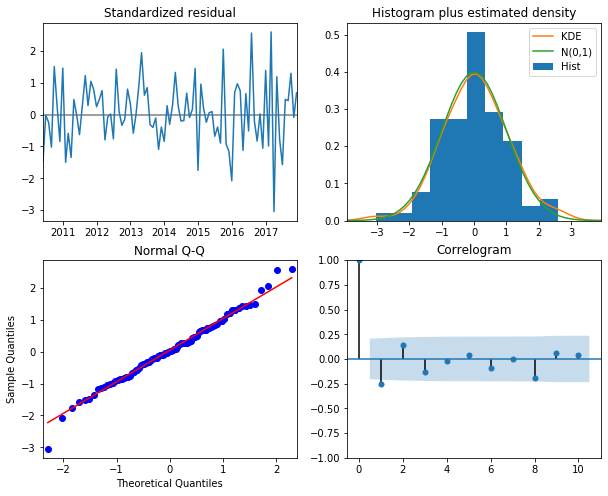

In [307]:
result_best.plot_diagnostics(figsize =(10,8))
plt.show()

Text(0, 0.5, 'Price')

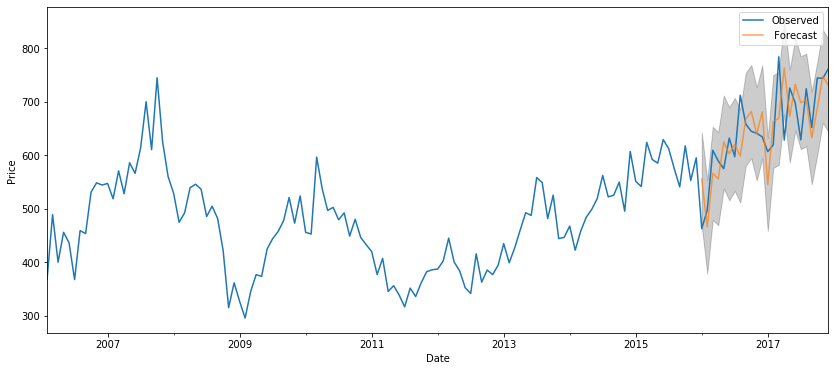

In [302]:
#predicting 
predict = result_best.get_prediction(start = pd.to_datetime('2016-01-01'),dynamic = False)
predict_ci = predict.conf_int()
ax = df.Price.plot(label = 'Observed',figsize = (14,6))
predict.predicted_mean.plot(ax =ax , label =" Forecast",alpha = .7)
ax.fill_between(predict_ci.index,predict_ci.iloc[:,0],
               predict_ci.iloc[:,1],color = 'k',alpha = .2)
plt.legend(loc = 'best')
ax.set_ylabel('Price')

Text(0, 0.5, 'Price')

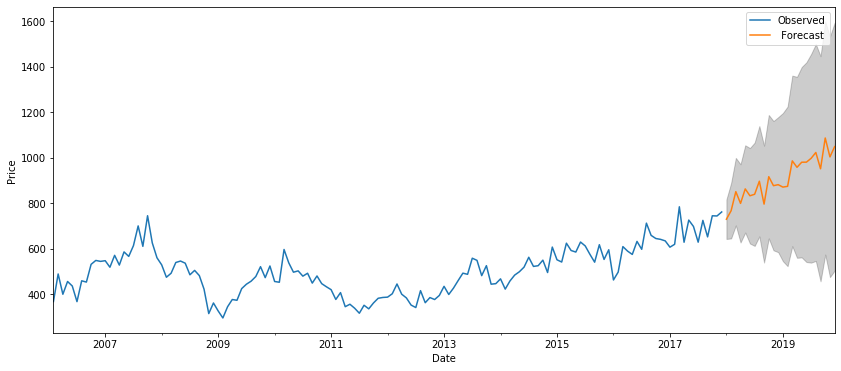

In [303]:
#forecasting
predict_uc  = result_best.get_forecast(steps =24)
predict_uc_ci = predict_uc.conf_int()
ax = df.Price.plot(label = 'Observed',figsize = (14,6))
predict_uc.predicted_mean.plot(ax =ax , label =" Forecast")
ax.fill_between(predict_uc_ci.index,predict_uc_ci.iloc[:,0],
               predict_uc_ci.iloc[:,1],color = 'k',alpha = .2)
plt.legend(loc = 'best')
ax.set_ylabel('Price')

In [304]:
#calculating error mse and rmse
df_predict = predict.predicted_mean
df_truth = df.Price['2016-01-01':]
mse = ((df_predict-df_truth)**2).mean()
root_mse = round(np.sqrt(mse),2)
print(f" The Mean Squared Error is {round(mse,2)}")
print(f" The Root Mean Square Error is {root_mse}")
                                          

 The Mean Squared Error is 3509.79
 The Root Mean Square Error is 59.24


In [305]:
df_predict = predict.predicted_mean
df_predict_truth = pd.DataFrame(df_predict,columns = ['Predict_price'])
df_predict_truth['Truth_price'] = df_truth
df_predict_truth


,Predict_price,Truth_price
Date,,
2016-01-01,555.538914,462.63
2016-02-01,466.069258,497.26
2016-03-01,566.340972,609.39
2016-04-01,556.134307,589.46
2016-05-01,624.879191,574.93
2016-06-01,602.785431,632.17
2016-07-01,620.336289,597.45
2016-08-01,598.613373,712.43
2016-09-01,667.528333,658.68


In [306]:
# Forecasting Cisco stock Price upto 12 month.
forecast = predict_uc.predicted_mean
forecast

2018-01-01     729.743098
2018-02-01     767.143510
2018-03-01     851.029353
2018-04-01     799.323198
2018-05-01     863.008752
2018-06-01     832.778887
2018-07-01     839.459012
2018-08-01     896.812734
2018-09-01     796.152258
2018-10-01     916.745835
2018-11-01     877.220548
2018-12-01     881.644313
2019-01-01     870.969195
2019-02-01     874.270183
2019-03-01     986.218866
2019-04-01     957.963424
2019-05-01     980.393568
2019-06-01     980.650916
2019-07-01     997.512569
2019-08-01    1023.178941
2019-09-01     951.608299
2019-10-01    1086.824238
2019-11-01    1003.733398
2019-12-01    1048.990978
Freq: MS, dtype: float64